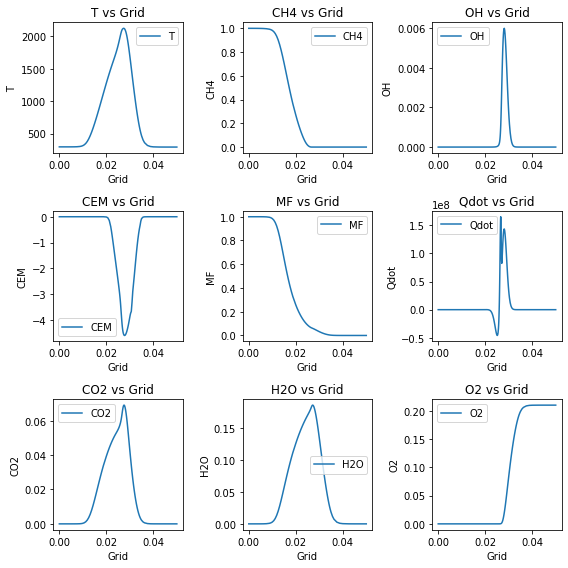

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = "SIM_results/case_CH4_counterflow/CH4_NP_0.csv"
df = pd.read_csv(csv_file)

# Extract the relevant columns for plotting
columns_to_plot = ['T', 'CH4', 'OH', 'CEM', 'MF', 'Qdot', 'CO2', 'H2O', 'O2']
# columns_to_plot = ['T', 'Y_CH4', 'Y_OH', 'CEM', 'MF', 'Qdot', 'Y_CO2', 'Y_H2O', 'Y_CH3']

df_to_plot = df[columns_to_plot]

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through variables and plot each one
for i, var in enumerate(columns_to_plot):
    axes[i].plot(df['grid'], df_to_plot[var], label=var)
    axes[i].set_xlabel('Grid')
    axes[i].set_ylabel(var)
    # axes[i].set_yscale('log')
    axes[i].set_title(f'{var} vs Grid')
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
import math
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_1D_comparison(true_csv_file, recon_csv_file, tuned_csv_file, columns_to_plot):
    # load all three
    df_true  = pd.read_csv(true_csv_file)
    df_recon = pd.read_csv(recon_csv_file)
    df_tuned = pd.read_csv(tuned_csv_file)

    n = len(columns_to_plot)
    ncols = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(4*ncols, 3*nrows),
                             squeeze=False)
    axes_flat = axes.flatten()

    for i, var in enumerate(columns_to_plot):
        ax = axes_flat[i]
        x = df_true['grid']

        ax.plot(x, df_true[var],  '-',  label='True',    linewidth=2)
        ax.plot(x, df_recon[var], '--', label='Recon',   linewidth=2)
        ax.plot(x, df_tuned[var],  ':',  label='Tuned',   linewidth=2)

        ax.set_xlabel('Grid')
        ax.set_ylabel('Mass Fraction')
        ax.set_title(var)
        ax.legend()

    # drop any unused subplots
    for j in range(n, nrows*ncols):
        fig.delaxes(axes_flat[j])

    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------

def plot_1D_ori(true_csv_file, recon_csv_file, columns_to_plot):
    # load all three
    df_true  = pd.read_csv(true_csv_file)
    df_recon = pd.read_csv(recon_csv_file)

    n = len(columns_to_plot)
    ncols = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(4*ncols, 3*nrows),
                             squeeze=False)
    axes_flat = axes.flatten()

    for i, var in enumerate(columns_to_plot):
        ax = axes_flat[i]
        x = df_true['grid']

        ax.plot(x, df_true[var],  '-',  label='True',    linewidth=2)
        ax.plot(x, df_recon[var], '--', label='Recon',   linewidth=2)

        ax.set_xlabel('Grid')
        ax.set_ylabel('Mass Fraction')
        ax.set_title(var)
        ax.legend()

    # drop any unused subplots
    for j in range(n, nrows*ncols):
        fig.delaxes(axes_flat[j])

    plt.tight_layout()
    plt.show()



def plot_all_cases(all_cases, true_dir, recon_dir, columns_to_plot):
    n = len(columns_to_plot)
    ncols = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(4*ncols, 3*nrows),
                             squeeze=False)
    axes_flat = axes.flatten()

    for i, var in enumerate(columns_to_plot):
        ax = axes_flat[i]
        for case in all_cases:
            # build paths
            true_csv  = os.path.join(true_dir,  f"{case}.csv")
            recon_csv = os.path.join(recon_dir, f"{case}_recon_ori.csv")

            df_true  = pd.read_csv(true_csv)
            df_recon = pd.read_csv(recon_csv)

            # select every 2nd point
            x_true = df_true['grid'].iloc[::2]
            y_true = df_true[var].iloc[::2]

            x_recon = df_true['grid'].iloc[::2]
            y_recon = df_recon[var].iloc[::2]

            # scatter true with small markers
            ax.scatter(x_true, y_true,
                       s=10,
                       label=f'{case} True')

            # line for recon (every 2nd point)
            ax.plot(x_recon, y_recon,
                    '--',
                    linewidth=1,
                    label=f'{case} Recon')

        ax.set_xlim(0.02, 0.035)
        ax.set_xlabel('Grid')
        ax.set_ylabel('Mass Fraction')
        ax.set_title(var)
        # ax.legend(fontsize='small', loc='best')
        ax.grid(False)  # turn grid off

    # drop any unused subplots
    for j in range(n, nrows*ncols):
        fig.delaxes(axes_flat[j])

    plt.tight_layout()
    plt.show()


def plot_all_cases_comparison(all_cases,
                              true_dir,
                              recon_dir,
                              tuned_dir,
                              columns_to_plot):
    n = len(columns_to_plot)
    ncols = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(4*ncols, 3*nrows),
                             squeeze=False)
    axes_flat = axes.flatten()

    for i, var in enumerate(columns_to_plot):
        ax = axes_flat[i]
        for case in all_cases:
            # file paths
            true_csv  = os.path.join(true_dir,  f"{case}.csv")
            recon_csv = os.path.join(recon_dir, f"{case}_recon_ori.csv")
            tuned_csv = os.path.join(tuned_dir, f"{case}_recon_finetuned.csv")

            df_true  = pd.read_csv(true_csv)
            df_recon = pd.read_csv(recon_csv)
            df_tuned = pd.read_csv(tuned_csv)

            # downsample every 2nd point
            x = df_true['grid'].iloc[::2]
            y_true  = df_true[var].iloc[::2]
            y_recon = df_recon[var].iloc[::2]
            y_tuned = df_tuned[var].iloc[::2]

            # plot each
            ax.scatter(x, y_true,
                       s=10,
                       label=f'{case} True')
            ax.plot(x, y_recon,
                    '--',
                    linewidth=1,
                    label=f'{case} Recon')
            ax.plot(x, y_tuned,
                    ':',
                    linewidth=1,
                    label=f'{case} Tuned')

        ax.set_xlim(0.02, 0.035)
        ax.set_xlabel('Grid')
        ax.set_ylabel('Mass Fraction')
        ax.set_title(var)
        # ax.legend(fontsize='small', loc='best', ncol=2)
        ax.grid(False)

    # remove any unused subplots
    for j in range(n, nrows*ncols):
        fig.delaxes(axes_flat[j])

    plt.tight_layout()
    plt.show()



# 把ori, ori_recon, neural ode finetune画在一起！

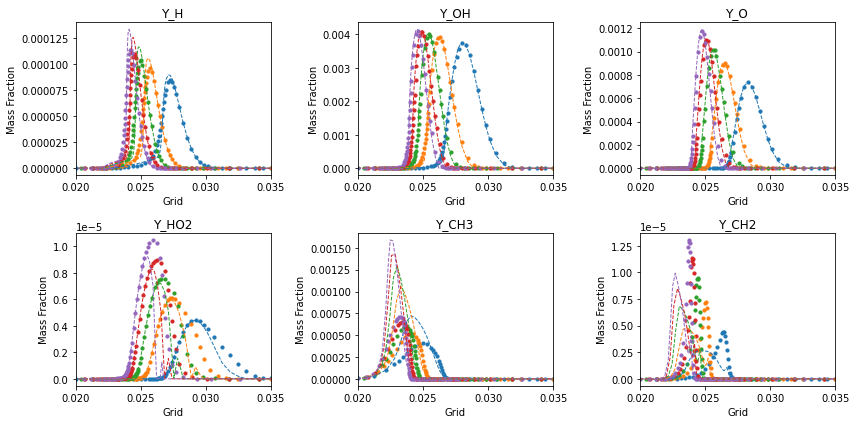

In [51]:
all_cases        = ["CH4_NP_0","CH4_NP_1","CH4_NP_2","CH4_NP_3","CH4_NP_4"]
true_dir         = os.path.join("SIM_results", "case_CH4_counterflow")
recon_dir        = os.path.join("julia_opt", "CH4_counterflow", "recon")
columns_to_plot  = ['Y_H', 'Y_OH', 'Y_O', 'Y_HO2', 'Y_CH3', 'Y_CH2']

plot_all_cases(all_cases, true_dir, recon_dir, columns_to_plot)


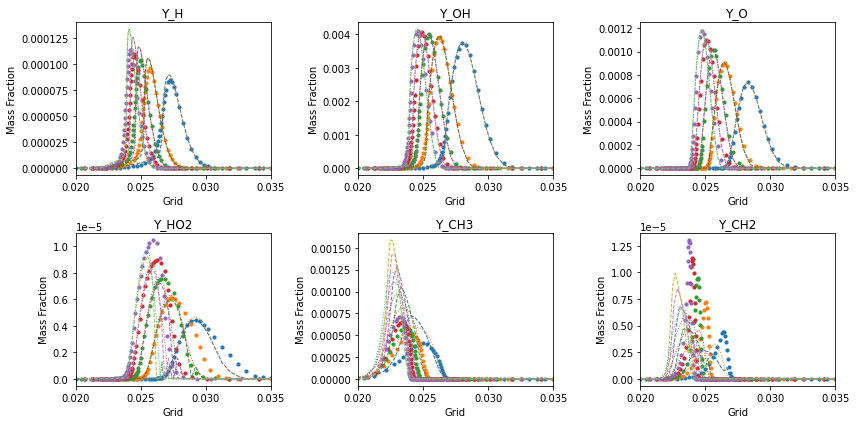

In [55]:
all_cases       = ["CH4_NP_0","CH4_NP_1","CH4_NP_2","CH4_NP_3","CH4_NP_4"]
true_dir        = os.path.join("SIM_results", "case_CH4_counterflow")
recon_dir       = os.path.join("julia_opt",  "CH4_counterflow", "recon")
tuned_dir       = os.path.join("julia_opt",  "CH4_counterflow", "recon", "CH3_1opt")  # or wherever you store the tuned files
columns_to_plot = ['Y_H', 'Y_OH', 'Y_O', 'Y_HO2', 'Y_CH3', 'Y_CH2']

plot_all_cases_comparison(all_cases,
                            true_dir,
                            recon_dir,
                            tuned_dir,
                            columns_to_plot)

recon_csv_file julia_opt/CH4_counterflow/recon/CH3_3opt/CH4_NP_0_recon_ori.csv

── Plotting case: CH4_NP_0 ──


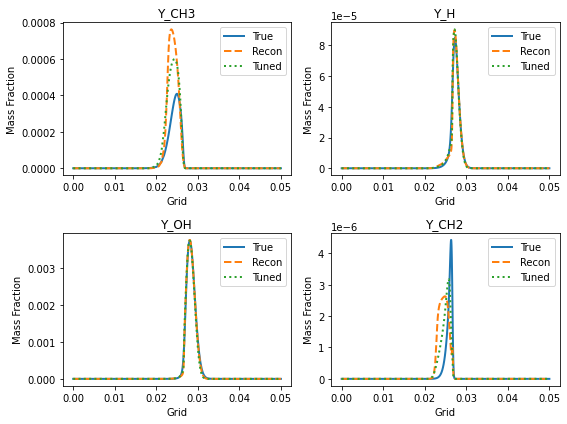

recon_csv_file julia_opt/CH4_counterflow/recon/CH3_3opt/CH4_NP_1_recon_ori.csv

── Plotting case: CH4_NP_1 ──


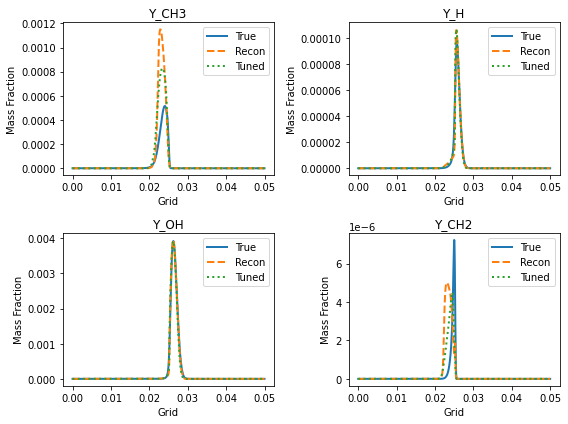

recon_csv_file julia_opt/CH4_counterflow/recon/CH3_3opt/CH4_NP_2_recon_ori.csv

── Plotting case: CH4_NP_2 ──


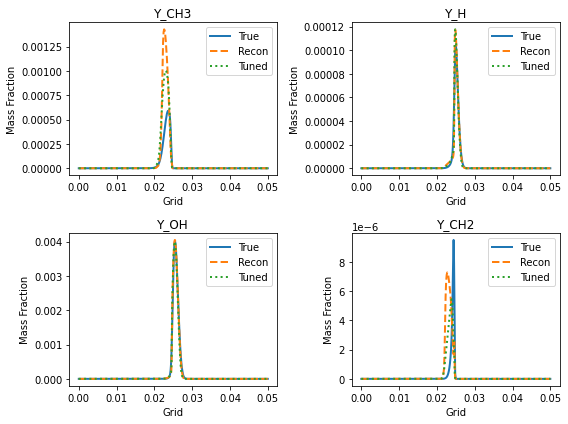

recon_csv_file julia_opt/CH4_counterflow/recon/CH3_3opt/CH4_NP_3_recon_ori.csv

── Plotting case: CH4_NP_3 ──


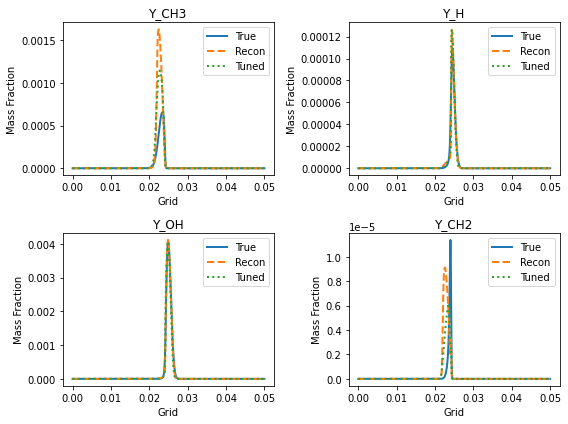

recon_csv_file julia_opt/CH4_counterflow/recon/CH3_3opt/CH4_NP_4_recon_ori.csv

── Plotting case: CH4_NP_4 ──


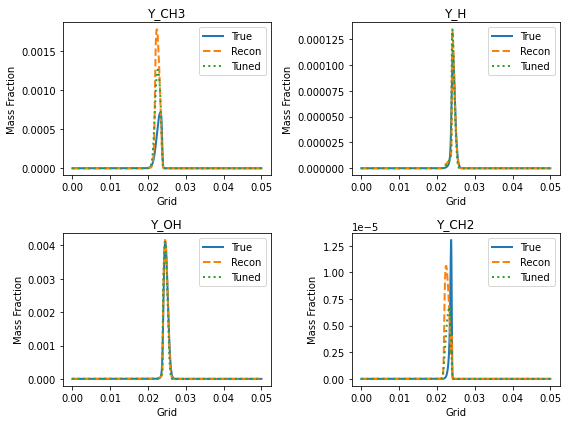

In [57]:

# loop over all cases
all_cases = ["CH4_NP_0","CH4_NP_1","CH4_NP_2","CH4_NP_3","CH4_NP_4"]
columns_to_plot = ['Y_CH3', 'Y_H', 'Y_OH', 'Y_CH2']   # you can add more, e.g. ['Y_CH','Y_OH','Y_H']
# columns_to_plot = ['Y_CH3']   # you can add more, e.g. ['Y_CH','Y_OH','Y_H']

species_dir = "CH3_3opt"
# species_dir = "CH3"
# species_dir = "CH2"


for case in all_cases:
    
    # build file paths
    true_csv_file  = os.path.join("SIM_results", "case_CH4_counterflow", f"{case}.csv")
    recon_csv_file = os.path.join("julia_opt",  "CH4_counterflow",   "recon", species_dir, f"{case}_recon_ori.csv")
    tuned_csv_file = os.path.join("julia_opt",  "CH4_counterflow",   "recon", species_dir, f"{case}_recon_finetuned.csv")
    print("recon_csv_file",recon_csv_file)
    print(f"\n── Plotting case: {case} ──")
    plot_1D_comparison(true_csv_file, recon_csv_file, tuned_csv_file, columns_to_plot)

    # if you prefer to save each figure instead of—or in addition to—showing:
    # out_name = f"plots/{case}_comparison.png"
    # plt.savefig(out_name)
    # print(f"Saved figure to {out_name}")